In [1]:
# load libraries and set plot parameters
import numpy as np
import prettytable as pt

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = "sans-serif"
# plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

# data = np.array([[1,2,3],[2,3,4]])
# x = pt.PrettyTable(["City name", "Area", "Population", "Annual Rainfall"])
# x.align["City name"] = "l" # Left align city names
# x.add_row(["Adelaide",1295, 1158259, 600.5])
# x.add_row(["Brisbane",5905, 1857594, 1146.4])
# x.add_row(["Darwin", 112, 120900, 1714.7])
# x.add_row(["Hobart", 1357, 205556, 619.5])
# x.add_row(["Sydney", 2058, 4336374, 1214.8])
# x.add_row(["Melbourne", 1566, 3806092, 646.9])
# x.add_row(["Perth", 5386, 1554769, 869.4])
# print(x)

\usepackage{dsfont}

###### $\tau$-ratio
The ratio of frames that have all of their respectively detected joints within a certain error bound $\tau$ to the groundtruth annotation:
$$
\tau\mbox{-}ratio = \frac{\sum_i \mathds{1}( max_j(\epsilon_{ij}) \le \tau )}{N},
$$
where $\epsilon_{ij} = \left\lVert p_{ij} - g_{ij} \right\rVert$ is the error of $j$-th joint in the $i$-th frame, and $\mathds{1}$ is the indicator function.

###### Per-joint mean error
The mean error for the $j$-th joint between prediction and groundtruth over all test frames:
$$
\epsilon^{mean}_j = \frac{\sum_i \epsilon_{ij}}{N}.
$$

###### Mean error distribution
The mean error of all joints within each single frame is collected into a histogram to evaluate the overall performance:
$$
\epsilon^{mean}_i = \frac{\sum_j \epsilon_{ij}}{J}.
$$

In [2]:
%load_ext autoreload
%autoreload 2
import sys; sys.argv=['']; del sys
from args_holder import args_holder

argsholder = args_holder()
argsholder.parse_args()
ARGS = argsholder.args
ARGS.batch_size = 16
ARGS.max_epoch = 1
argsholder.create_instance()
data_inst = ARGS.data_inst

splitted data: [  0 945] training, [945 999] test.
using shuffled data: /home/xwu/projects/univue-hand-pose/output/hands17/annotation_shuffled.txt
using cropped and resized images: /home/xwu/projects/univue-hand-pose/output/hands17/cropped
images are splitted out for evaluation: 64 portions


In [3]:
import os
from train.train_abc import train_abc

trainer = train_abc(ARGS, False)
if (not os.path.exists(data_inst.training_annot_predict)):
    trainer.evaluate()

splitted data: [  0 945] training, [945 999] test.
using shuffled data: /home/xwu/projects/univue-hand-pose/output/hands17/annotation_shuffled.txt
using cropped and resized images: /home/xwu/projects/univue-hand-pose/output/hands17/cropped
images are splitted out for evaluation: 64 portions
drawing pose #219: /home/xwu/data/hands17/training/images/image_D00000219.png
drawing pose #219: /home/xwu/projects/univue-hand-pose/output/hands17/cropped/image_D00000219.png


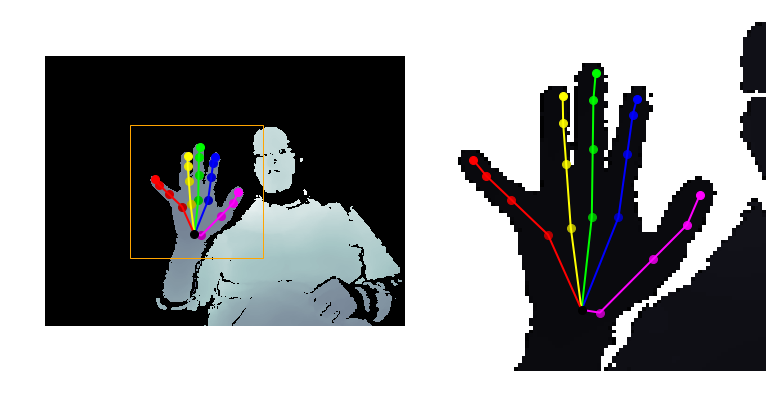

drawing pose #43: /home/xwu/data/hands17/training/images/image_D00000477.png


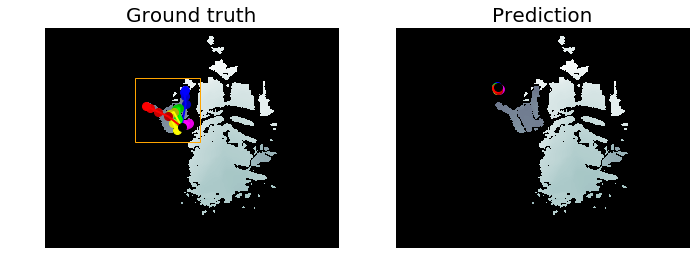

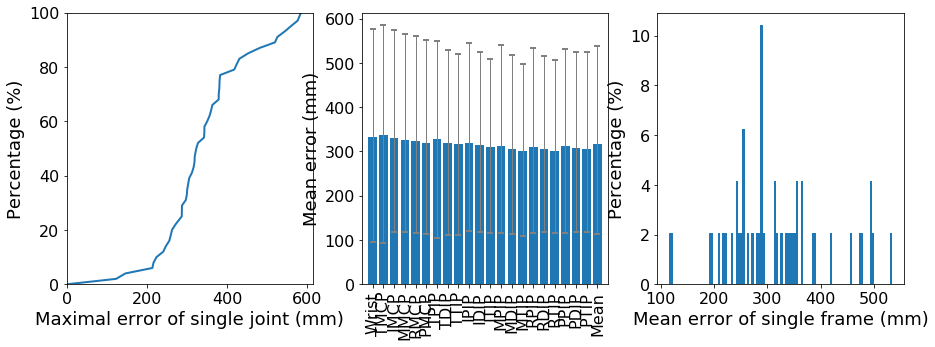

In [4]:
%run 'train/eval_base_regre.py'

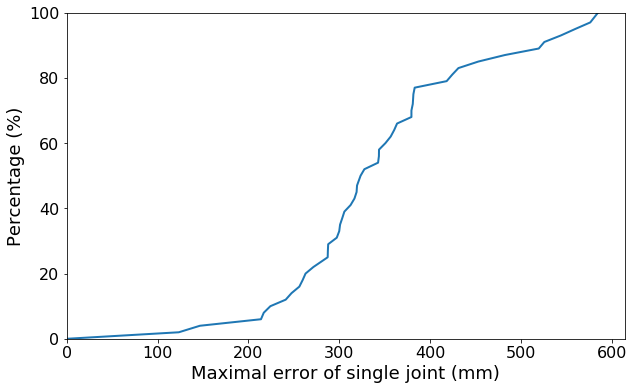

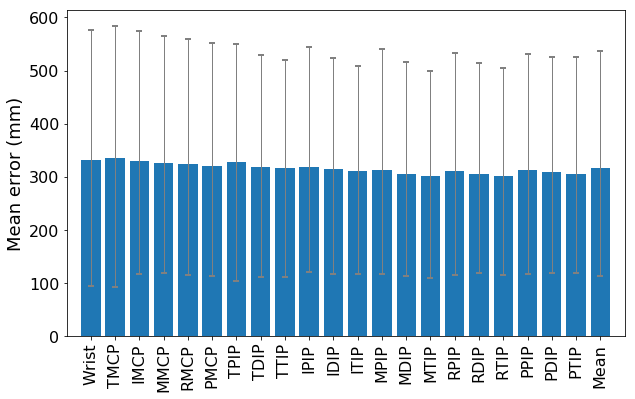

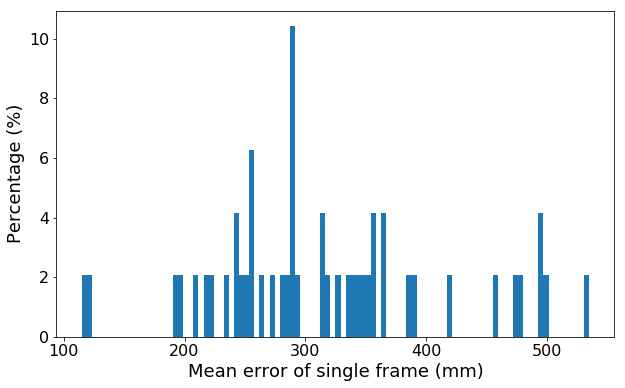

In [5]:
import matplotlib.pyplot as mpplot
dataeval = import_module(
    'data.' + ARGS.data_name + '.eval')

errors = dataeval.compare_error(
    data_inst,
    data_inst.training_annot_test,
    data_inst.training_annot_predict
)
mpplot.subplot()
dataeval.draw_error_percentage_curve(errors, mpplot.gca())
mpplot.show()
mpplot.subplot()
dataeval.draw_error_per_joint(errors, mpplot.gca(), data_inst.join_name)
mpplot.subplot()
mpplot.show()
dataeval.draw_mean_error_distribution(errors, mpplot.gca())
mpplot.show()

drawing pose #432: /home/xwu/data/hands17/training/images/image_D00000432.png


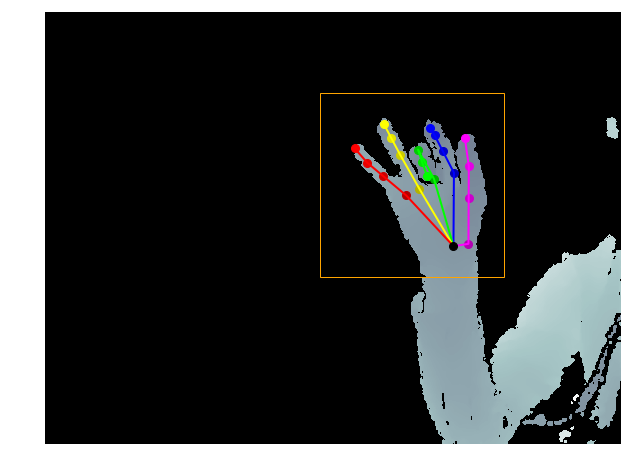

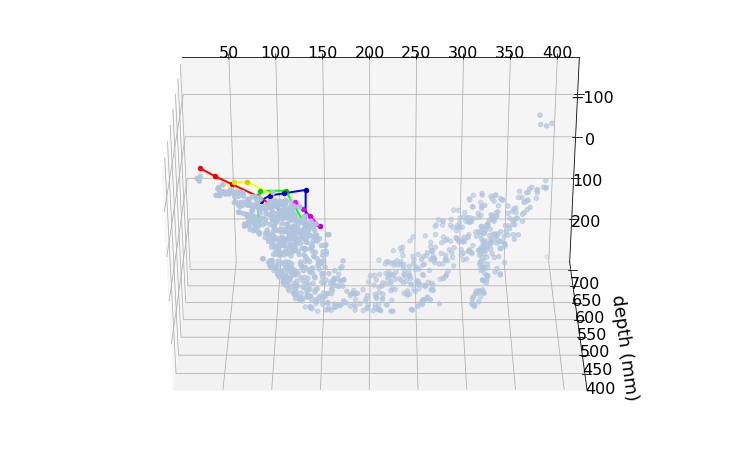

[ 1806.2085966   1257.86193761   220.78146337]
[ 122.644   120.7244   94.9882]
61.322


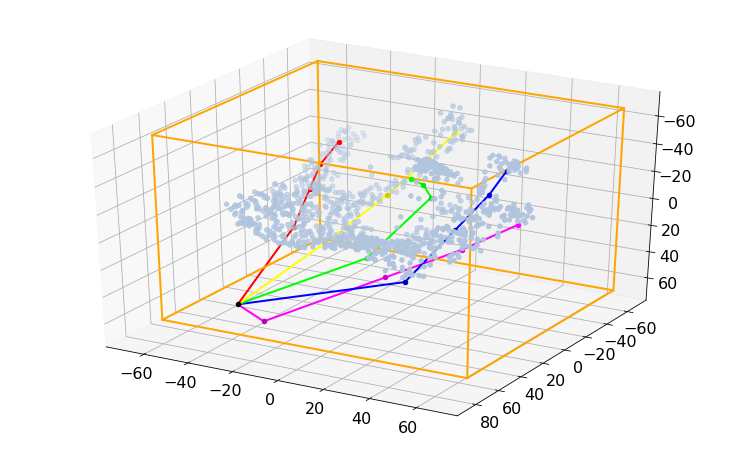

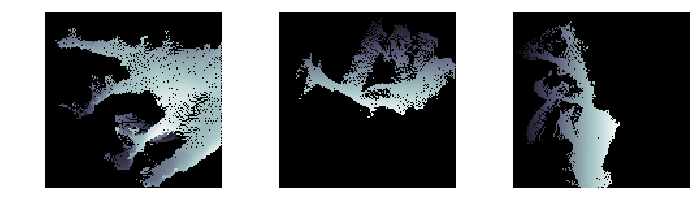

432

In [8]:
# %matplotlib notebook
datadraw.draw_raw3d_random(
    data_inst,
    data_inst.training_images,
    data_inst.training_annot_cleaned
)